# 回帰分析

## 単回帰モデル

ある変数$x_2$を別の変数$x_1$から予測する問題を考える。

$$
x_2 = \alpha x_1 + \beta + e
$$

$x_1$は**予測変数**（predictor variable）、$x_2$は**基準変数**（criterion variable）と呼ばれる確率変数である。

$e$は予測誤差を表現する確率変数であり**誤差変数**といい、以下の性質を仮定する。

- $E[e] = 0$（誤差は正負バランスよく出現する）
- $E[e x_1] = 0$（予測変数の値が大きくても小さくても誤差は大きくなったり小さくなったりする傾向はない）


パラメータの推定には最尤法や最小二乗法やモーメント法などが使われる

### モーメント法による単回帰モデルの推定

単回帰モデルの両辺の期待値をとると

$$
E[x_2] = \alpha E[x_1] + E[\beta] + \underbrace{ E[e] }_{=0}\\
\implies \beta = E[x_2] - \alpha E[x_1]
$$

となる。

次に、単回帰モデルの両辺に$x_1$をかけてから期待値をとると

$$
E[x_2 x_1] = \alpha E[x_1 x_1] + \beta E[x_1] + \underbrace{ E[e x_1] }_{=0}\\
$$

$\beta = E[x_2] - \alpha E[x_1]$を代入すると

$$
\begin{align}
E[x_2 x_1]
&= \alpha E[x_1 x_1] + E[x_1] (E[x_2] - \alpha E[x_1])\\
&= \alpha E[x_1^2] + E[x_1] E[x_2] - \alpha E[x_1]^2\\
&= E[x_1] E[x_2] + \alpha (E[x_1^2] - E[x_1]^2)\\
&= E[x_1] E[x_2] + \alpha V[x_1]\\
\implies 
E[x_2 x_1] - E[x_1] E[x_2] &= \alpha V[x_1]\\
\end{align}
$$

分散は

$$
V[x] = E[x^2] - E[x]^2\\
\to E[x^2] = V[x] - E[x]^2
$$

であり、

$$
\newcommand{\b}[1]{ \boldsymbol{#1} }
\begin{align}
\b{\Sigma}
&= E[(\b{x} - \b{\mu})(\b{x} - \b{\mu})^\top]\\
&= E[\b{x x}^\top] - E[\b{x}]\b{\mu}^\top - \b{\mu} E[\b{x}^\top] + \b{\mu\mu}^\top\\
&= E[\b{x x}^\top] - 2\b{\mu\mu}^\top + \b{\mu\mu}^\top\\
&= E[\b{x x}^\top] - \b{\mu\mu}^\top\\
\end{align}
$$

であり、2変数だと

$$
\begin{align}
\b{\Sigma}
&=
E\left[ \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
        \begin{pmatrix} x_1 & x_2 \end{pmatrix} \right]
-
\begin{pmatrix} E[x_1] \\ E[x_2] \end{pmatrix}
\begin{pmatrix} E[x_1] & E[x_2] \end{pmatrix}\\
&=
\begin{pmatrix}
    E[x_1^2] & E[x_1 x_2]\\
    E[x_2 x_1] & E[x_2^2]
\end{pmatrix}
-
\begin{pmatrix}
    E[x_1]^2 & E[x_1]E[x_2]\\
    E[x_2]E[x_1] & E[x_2]^2
\end{pmatrix}
\end{align}
$$

であることを利用すると

$$
\begin{align}
E[x_2 x_1] - E[x_1] E[x_2] &= \alpha V[x_1]\\
V[x_1 x_2] &= \alpha V[x_1]\\
\alpha &= \frac{V[x_1 x_2]}{V[x_1]}
\end{align}
$$

推定では標本の統計量を用いて

$$
\begin{align}
\hat{\alpha} &= \frac{s_{21}}{s^2_1}\\
\hat{\beta} &= \bar{x}_2 - \hat{\alpha} \bar{x}_1\\
\end{align}
$$

とする。

In [3]:
import semopy
import numpy as np
import pandas as pd

# 適当なデータを生成
n = 1000
np.random.seed(0)
x = np.random.uniform(size=n)
e = np.random.normal(size=n)
y = 10 + 3 * x + e
data = pd.DataFrame(dict(y=y, x=x))

# モデルを構築
desc = "y ~ x"
model = semopy.Model(desc)
model.fit(data)
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y,~,x,2.903337,0.105092,27.626547,0.0
1,y,~~,y,0.932673,0.041710,22.360680,0.0


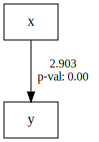

In [4]:
# パス図
semopy.semplot(model, filename="/tmp/path_diagram.png")